In [1]:
rootdir = '/home/lscsc/caizhijie/ref-rep/pytorch-openpose/dataparse/pathlist_train.pk'

import pickle as pk
df = pk.load(open(rootdir, 'rb'))

In [2]:
df.iloc[0]['dir'] + '/' + df.iloc[0]['path'] + '/' + df.iloc[0]['jpg'].split('/')[-1]

'pic_shac5_kicking_zdt_a3_lights/t8_2023_01_18_21_29_24_929/2023_01_18_21_29_26_963.jpg'

In [3]:
df

,jpg,path,dir,mov,obj,ang,rep
0,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t8_2023_01_18_21_29_24_929,pic_shac5_kicking_zdt_a3_lights,kicking,zdt,a3,8
1,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t5_2023_01_18_19_42_00_298,pic_shac5_standing_czj_a4_lights,standing,czj,a4,5
2,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t5_2023_01_18_19_56_58_817,pic_shac5_waving_zdt_a2_lights,waving,zdt,a2,5
3,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t8_2023_01_18_19_42_32_691,pic_shac5_standing_czj_a4_lights,standing,czj,a4,8
4,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t7_2023_01_18_20_06_29_150,pic_shac5_standing_zfq_a2_lights,standing,zfq,a2,7
...,...,...,...,...,...,...,...
51195,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t5_2023_01_18_21_39_04_469,pic_shac5_kicking_zdt_a4_lights,kicking,zdt,a4,5
51196,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t1_2023_01_18_19_50_48_443,pic_shac5_standing_zdt_a2_lights,standing,zdt,a2,1
51197,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t9_2023_01_18_21_25_19_917,pic_shac5_bending_zdt_a3_lights,bending,zdt,a3,9
51198,/home/lscsc/caizhijie/shar-data/archive/pic_sh...,t9_2023_01_18_21_39_48_553,pic_shac5_kicking_zdt_a4_lights,kicking,zdt,a4,9


openpose

In [4]:
openposedir = '/home/lscsc/caizhijie/archive_0118/openpose/'
thispath = df.iloc[0]['dir'] + '/' + df.iloc[0]['path'] + '/' + df.iloc[0]['jpg'].split('/')[-1]

arr = pk.load(open(openposedir + thispath[:-4] + '.pk', 'rb'))

In [5]:
'/'.join(df.iloc[0]['jpg'].split('/')[-3:])

'pic_shac5_kicking_zdt_a3_lights/t8_2023_01_18_21_29_24_929/2023_01_18_21_29_26_963.jpg'

In [6]:
arr['aff'].shape, arr['kpt'].shape

((19, 46, 46), (38, 46, 46))

In [31]:
import sys
sys.path.append('/home/lscsc/caizhijie/0420-wamera-benchmark/')
sys.path.append('/home/lscsc/caizhijie/0420-wamera-benchmark/src/')

from src.previewer import preview
from src.openpose import util
import cv2
import numpy as np

c, s = preview(np.ascontiguousarray(cv2.imread(df.iloc[0]['jpg'])), np.array(arr['kpt'], dtype=float), np.array(arr['aff'], dtype=float))
canvas = util.draw_bodypose(np.ascontiguousarray(cv2.imread(df.iloc[0]['jpg'])), c, s)

In [33]:
np.ascontiguousarray(cv2.imread(df.iloc[0]['jpg'])).shape

(512, 512, 3)

In [24]:
np.array(arr['kpt'], dtype=float).shape

(38, 46, 46)

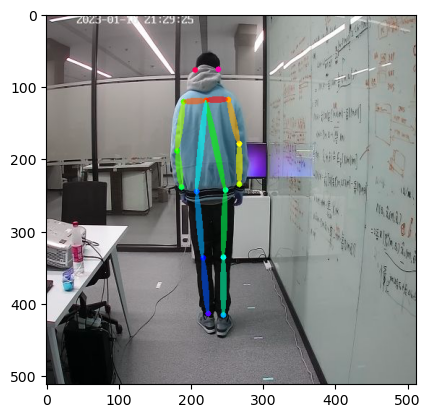

In [23]:
import matplotlib.pyplot as plt

plt.imshow(canvas)

maskrcnn

In [12]:
maskrcnndir = '/home/lscsc/caizhijie/archive_0118/maskrcnn/'
thispath = df.iloc[0]['dir'] + '/' + df.iloc[0]['path'] + '/' + df.iloc[0]['jpg'].split('/')[-1]

arr = pk.load(open(maskrcnndir + thispath[:-4] + '.pk', 'rb'))

/home/lscsc/caizhijie/miniconda3/envs/mtmd/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
arr.get_fields()['pred_boxes'][0].tensor, arr.get_fields()['pred_masks'][0].shape

(tensor([[171.1310,  53.6499, 283.1635, 446.7926]]), torch.Size([512, 512]))